# **Encaminhamentos**

1. Reimplementar a técnica com os dados do autor:
     - verificar se a plotagem é similar a que ele fez;
     - dica: cada um implementar individualmente e se ajudar quando uma dúvida surgir;
2. Verificar o problema relacionado ao treinamento com os dados de Covid-19.
---


## **Implementações de referência:** 
-  **[Link 1:](https://www.youtube.com/watch?v=GFSiL6zEZF0)**
-  **[Link 2:](https://www.youtube.com/watch?v=PuZY9q-aKLw)**

---



# \#1. Importando as bibliotecas

In [91]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [92]:
# !pip install pandas
# !pip install numpy
# !pip install datetime
# !pip install matplotlib
# !pip install sklearn
# !pip install tensorflow
# !pip install keras

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [94]:
# Vinicius
data = pd.read_csv('data/cases_per_day_brasil.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    627 non-null    object 
 1   Brasil  627 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.9+ KB


# \#2. Manipulando os dados

In [95]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Brasil'].values.reshape(-1, 1))

In [96]:
prediction_days = 60
future_days = 30

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data) - future_days):
  x_train.append(scaled_data[x-prediction_days: x, 0])
  y_train.append(scaled_data[x + future_days, 0])

In [97]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# \#3. Craindo e treinando o modelo

In [124]:
model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=30, batch_size=8)

# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/30
68/68 [==============================] - 10s 81ms/step - loss: 0.0245
Epoch 2/30
68/68 [==============================] - 5s 79ms/step - loss: 0.0207
Epoch 3/30
68/68 [==============================] - 5s 78ms/step - loss: 0.0195
Epoch 4/30
68/68 [==============================] - 5s 75ms/step - loss: 0.0206
Epoch 5/30
68/68 [==============================] - 5s 77ms/step - loss: 0.0197
Epoch 6/30
68/68 [==============================] - 5s 76ms/step - loss: 0.0184
Epoch 7/30
68/68 [==============================] - 5s 75ms/step - loss: 0.0192
Epoch 8/30
68/68 [==============================] - 5s 74ms/step - loss: 0.0180
Epoch 9/30
68/68 [==============================] - 5s 76ms/step - loss: 0.0190
Epoch 10/30
68/68 [==============================] - 5s 76ms/step - loss: 0.0195
Epoch 11/30
68/68 [==============================] - 5s 75ms/step - loss: 0.0185
Epoch 12/30
68/68 [==============================] - 5s 81ms/step - loss: 0.0171
Epoch 13/30
68/68 [=================

In [131]:
test_data = data[len(data)-60:]

actual_cases = test_data['Brasil'].values

total_dataset = pd.concat((data['Brasil'], test_data['Brasil']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days: ].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_cases = model.predict(x_test)
prediction_cases = scaler.inverse_transform(prediction_cases)

# \#4. Plotando predição

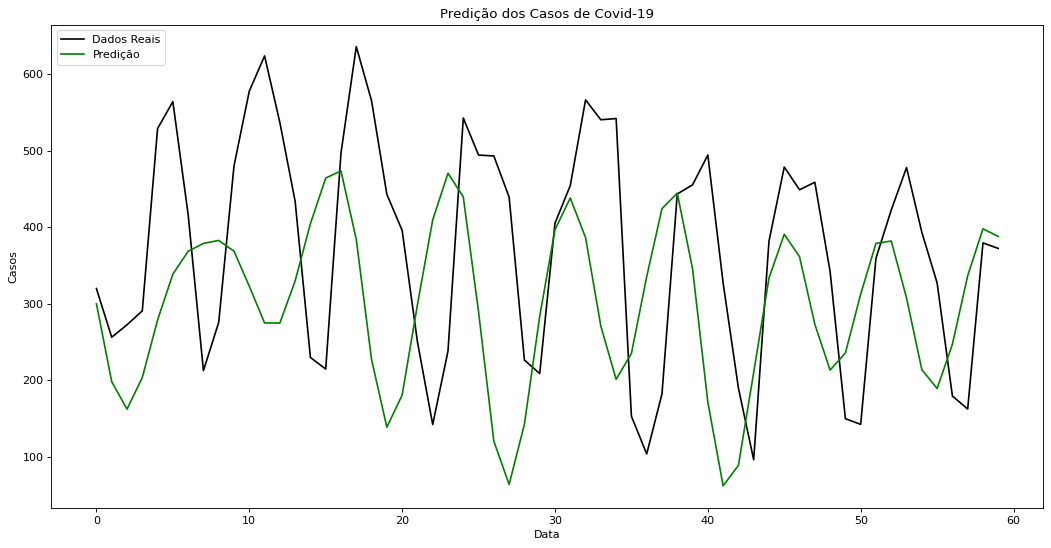

In [132]:
fig = plt.figure(figsize=(16, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(actual_cases, color='black', label='Dados Reais')
plt.plot(prediction_cases, color='green', label='Predição')
plt.title('Predição dos Casos de Covid-19')
plt.xlabel('Data')
plt.ylabel('Casos')
plt.legend(loc='upper left')
plt.show()

# \#5. Prevendo novo dia

In [114]:
real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1, 0]]
#real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs), 0]]
#real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1 , 0]]
#real_data = [model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]]

real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(prediction)

[[298.63748]]


In [115]:
print("tamanho1:", len(model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs), 0]))
print("tamanho2:", len(model_inputs[len(model_inputs) - prediction_days:len(model_inputs), 0]))
print("tamanho3:", len(model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]))
print("tamanho4:", len(model_inputs[len(model_inputs) - prediction_days:len(model_inputs) + 1, 0]))

tamanho1: 59
tamanho2: 60
tamanho3: 59
tamanho4: 60
